In [132]:
import pandas as pd
import glob
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [133]:
dfs = []

In [134]:
for f in glob.glob('lf_*'):
    print(f)
    df=pd.read_csv(f)
    dfs.append(df)
# df=pd.read_csv('lf_2023-04-20-05-20-47')

lf_2023-04-20-05-36-49
lf_2023-04-20-05-37-28
lf_2023-04-20-05-38-16
lf_2023-04-20-05-38-54
lf_2023-04-20-05-39-33
lf_2023-04-20-05-40-12
lf_2023-04-20-05-40-56
lf_2023-04-20-05-41-39
lf_2023-04-20-05-42-18
lf_2023-04-20-05-42-56
lf_1


In [135]:
df = pd.concat(dfs)

In [153]:
df['user_input_cnt']=df['num_complaints']+df['confirmation_cnt']

In [156]:
l = ['strat',
 'runtime',
 'avg_tree_size_increase',
 'user_input_cnt',
 'num_complaints',
 'confirmation_cnt',
 'global_accuracy',
 'fix_rate',
 'confirm_preserve_rate',
 'new_global_accuracy',
 'prev_signaled_cnt',
 'new_signaled_cnt']

In [161]:
df[l].sort_values(['user_input_cnt','strat'])

,strat,runtime,avg_tree_size_increase,user_input_cnt,num_complaints,confirmation_cnt,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cnt
0,information gain,0.001,0.0,2,0,2,0.921,1.000,1.0,0.921,861,861
0,information gain,0.002,0.0,2,0,2,0.921,1.000,1.0,0.921,861,861
0,information gain,0.001,0.0,2,0,2,0.921,1.000,1.0,0.921,861,861
0,information gain,0.001,0.0,2,0,2,0.921,1.000,1.0,0.921,861,861
0,information gain,0.001,0.0,2,0,2,0.921,1.000,1.0,0.921,861,861
0,information gain,0.002,0.0,2,0,2,0.921,1.000,1.0,0.921,861,861
0,information gain,0.002,0.0,2,0,2,0.921,1.000,1.0,0.921,861,861
0,information gain,0.002,0.0,2,0,2,0.921,1.000,1.0,0.921,861,861
0,information gain,0.002,0.0,2,0,2,0.921,1.000,1.0,0.921,861,861
0,information gain,0.002,0.0,2,0,2,0.921,1.000,1.0,0.921,861,861


In [138]:
list(df)

['strat',
 'runtime',
 'avg_tree_size_increase',
 'num_complaints',
 'confirmation_cnt',
 'global_accuracy',
 'fix_rate',
 'confirm_preserve_rate',
 'new_global_accuracy',
 'prev_signaled_cnt',
 'new_signaled_cnt',
 'user_input_cnt']

In [139]:
import matplotlib.pyplot as plt

<AxesSubplot: xlabel='strat,user_input_cnt'>

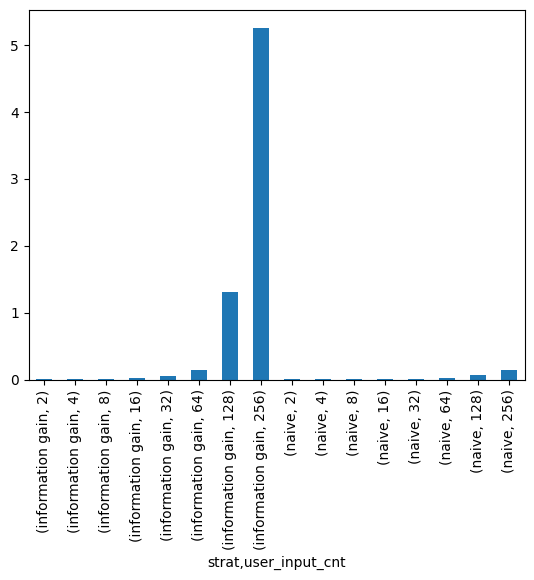

In [140]:
grouped = df.groupby(['strat','user_input_cnt']).mean()
# print(grouped)
grouped['runtime'].plot(kind='bar')

<AxesSubplot: xlabel='strat,user_input_cnt'>

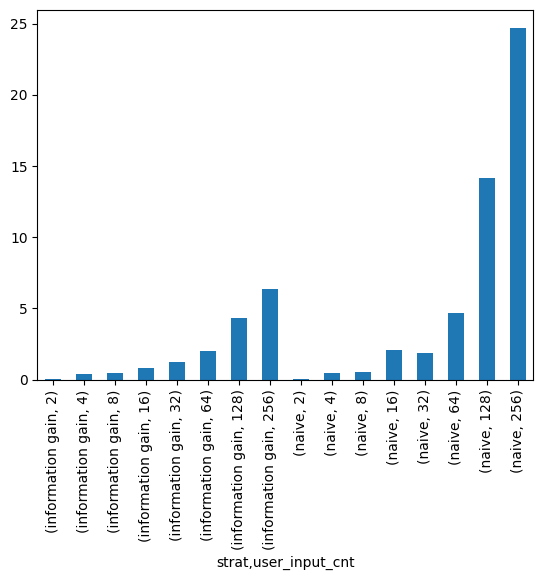

In [141]:
grouped['avg_tree_size_increase'].plot(kind='bar')

<AxesSubplot: xlabel='strat,user_input_cnt'>

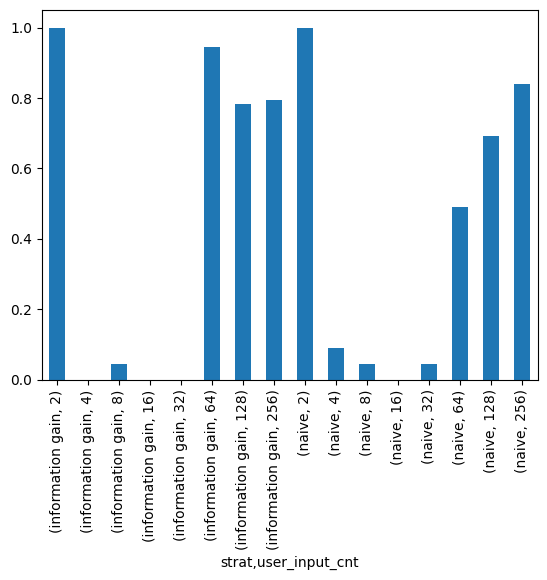

In [142]:
grouped['fix_rate'].plot(kind='bar')

[0.921]
[0.921 0.091]
[0.921]
[0.921]
[0.921]
[0.921 0.922]
[0.921]
[0.921]
[0.921]
[0.923 0.92 ]
[0.921]
[0.929 0.926]
[0.921]
[0.935 0.931]
[0.921]
[0.95  0.945]
[0.921]
[0.921 0.091]
[0.921]
[0.921 0.082]
[0.921]
[0.921 0.922]
[0.921]
[0.921]
[0.921]
[0.928 0.921]
[0.921]
[0.93  0.925]
[0.921]
[0.933 0.93 ]
[0.921]
[0.944 0.943]


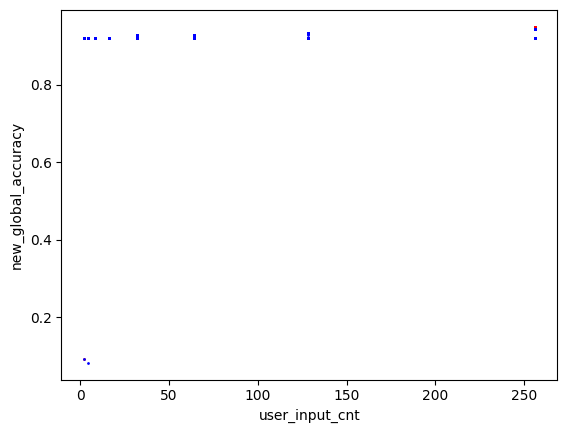

In [143]:
grouped = df.groupby(['strat','user_input_cnt'])
colors={'information gain': 'red', 'naive': 'blue'}
fig, ax = plt.subplots()

for name, group in grouped:
    print(group['global_accuracy'].unique())
    print(group['new_global_accuracy'].unique())
    group.plot(x='user_input_cnt', y='global_accuracy', kind='scatter', ax=ax, color=colors[name[0]], s=1)
    group.plot(x='user_input_cnt', y='new_global_accuracy', kind='scatter', ax=ax, color=colors[name[0]], s=1)
plt.show()

In [144]:
# df_initial[df_initial['model_pred']==-1]['vectors'].unique()

In [145]:
# df_initial[df_initial['model_pred']==1]['vectors'].unique()

In [146]:
# spam_l = list(df_initial[df_initial['model_pred']==0]['vectors'].unique())

In [147]:
# spam_l

In [148]:
# spam_l_proc = [x.replace('-1',' ') for x in spam_l]

In [149]:
# spam_l_proc

In [150]:
# df_initial[df_initial['model_pred']==0].groupby('vectors').size()

In [151]:
# len(df_initial[df_initial['expected_label']==df_initial['model_pred']])

In [152]:
# len(df_initial)